# Utilizing Social Networks


C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


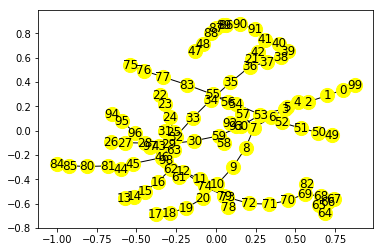

In [2]:
# Defining and Visualizing a Small World Network (Python)

# prepare for Python version 3x features and functions
from __future__ import division, print_function

# load package into the workspace for this program
import networkx as nx
import matplotlib.pyplot as plt  # 2D plotting
import numpy as np

# generate small-world network with n nodes
# k is number of nearby nodes to which each node is connected
# and p probability of rewiring from nearby node to random node
small_world = nx.watts_strogatz_graph(n = 100, k = 3, p = 0.25, seed = None)

# create an adjacency matrix object for the line network
# use nodelist argument to order the rows and columns
small_world_mat = nx.adjacency_matrix(small_world)
# print(small_world_mat)  # undirected networks are symmetric

# examine alternative layouts for plotting the small_world 
# plot the network/graph with default layout 
fig = plt.figure()
nx.draw_networkx(small_world, node_size = 200, node_color = 'yellow')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


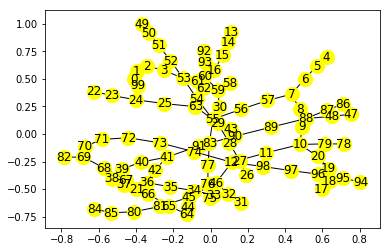

In [3]:
# spring layout
fig = plt.figure()
nx.draw_networkx(small_world, node_size = 200, node_color = 'yellow',pos = nx.spring_layout(small_world))
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


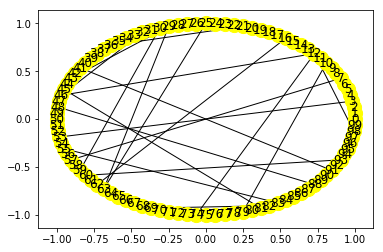

In [4]:
# circlular layout
fig = plt.figure()
nx.draw_networkx(small_world, node_size = 200, node_color = 'yellow',\
    pos = nx.circular_layout(small_world))
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


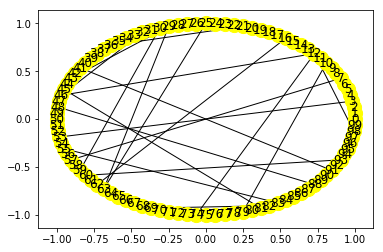

In [5]:
# shell/concentric circles layout
fig = plt.figure()
nx.draw_networkx(small_world, node_size = 200, node_color = 'yellow',\
    pos = nx.shell_layout(small_world))
plt.show()

In [6]:
# Gephi provides interactive network plots 
# dump the graph object in GraphML format for input to Gephi
# and for initial network structure in pynetsim
nx.write_graphml(small_world,'small_world_network.graphml')

# Analysis of Agent-Based Simulation

In [9]:
# prepare for Python version 3x features and functions
from __future__ import division, print_function
#from future_builtins import ascii, filter, hex, map, oct, zip

# import packages into the namespace for this program
import numpy as np
import pandas as pd
import statsmodels.api as sm

# -----------------------------
# Simulation study background
# -----------------------------
# an agent-based simulation was run with NetLogo, a public-domain
# program available from Northwestern University

# added one line of code to the Virus on a Network program:

#if ticks = 200 [stop]

# this line was added to stop the simulation at exactly 200 ticks
# the line was added to the <to go> code block as shown here:
# 
# to go
#   if all? turtles [not infected?]
#     [ stop ]
#   ask turtles
#   [
#      set virus-check-timer virus-check-timer + 1
#      if virus-check-timer >= virus-check-frequency
#        [ set virus-check-timer 0 ]
#   ]
#   if ticks = 200 [stop]
#   spread-virus
#   do-virus-checks
#   tick
# end

# the simulation stops if no nodes/turtles were infected 
# or if the simulation reaches 200 ticks

# To see the results of the simulation at 200 ticks, we route the simulation
# world to a file using the GUI File/Export/Export World  
# this gives an a comma-delimited text file of the status of the network 
# at 200 ticks. Specifically, we enter the following Excel command into 
# cell D1 of the results spreadsheet to compute the proportion of nodes 
# infected:   = COUNTIF(N14:N163, TRUE)/M10

# NetLogo turtle infected status values were given in cells N14 through N163. 
# The detailed results of the simulation runs or trials are shown in the files 
# <trial01.csv> through <trial20.csv> under the directory NetLogo_results

# this particular experiment, has average connectivity or node degree 
# at 3 or 5 and the susceptibility or virus spread chance to 5 or 10 percent. 
# we have a completely crossed 2 x 2 design with 5 replications of each cell
# that is, we run each treatment combination 5 times, 20 independent 
# observations or trials. for each trial, we note the percentage of infected 
# nodes after 200 ticks---this is the response variable
# results are summarized in the comma-delimited file <virus_results.csv>. 

# -----------------------------
# Analysis of Deviance
# -----------------------------

# read in summary results and code the experimental factors
virus = pd.read_csv("virus_results.csv")

# check input DataFrame
print(virus)

    trial  degree  spread  infected
0       1       3       5    0.1133
1       2       3       5    0.1533
2       3       3       5    0.0867
3       4       3       5    0.1400
4       5       3       5    0.1133
5       6       3      10    0.2000
6       7       3      10    0.1067
7       8       3      10    0.0867
8       9       3      10    0.4133
9      10       3      10    0.4267
10     11       5       5    0.3067
11     12       5       5    0.4867
12     13       5       5    0.4867
13     14       5       5    0.4667
14     15       5       5    0.6800
15     16       5      10    0.4733
16     17       5      10    0.5133
17     18       5      10    0.5400
18     19       5      10    0.5933
19     20       5      10    0.5667


In [10]:
Intercept = np.array([1] * len(virus))

# use dictionary object for mapping to 0/1 binary codes
degree_to_binary = {3 : 0, 5 : 1}
Connectivity = np.array(virus['degree'].map(degree_to_binary))

# use dictionary object for mapping to 0/1 binary codes
spread_to_binary = {5 : 0, 10 : 1}
Susceptibility = np.array(virus['spread'].map(spread_to_binary))

Connectivity_Susceptibility = Connectivity * Susceptibility

Design_Matrix = np.array([Intercept, Connectivity, Susceptibility, Connectivity_Susceptibility]).T

print(Design_Matrix)

[[1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 1 0]
 [1 0 1 0]
 [1 0 1 0]
 [1 0 1 0]
 [1 0 1 0]
 [1 1 0 0]
 [1 1 0 0]
 [1 1 0 0]
 [1 1 0 0]
 [1 1 0 0]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]


In [11]:
Market_Share = np.array(virus['infected'])

# generalized linear model for a response variable that is a proportion
glm_binom = sm.GLM(Market_Share, Design_Matrix, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       16
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7.9002
Date:                Sun, 17 Feb 2019   Deviance:                      0.94434
Time:                        14:52:51   Pearson chi2:                    0.920
No. Iterations:                     5   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9800      1.370     -1.446      0.148      -4.665       0.705
x1             1.9214      1.636      1.174      0.2